In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [56]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi
from rdkit.Chem import Draw, rdDepictor
from IPython.display import display

def is_same_mol(mol1: Mol, mol2: Mol, options=None):
    inchi1 = inchi.MolToInchiKey(mol1, options)
    inchi2 = inchi.MolToInchiKey(mol2, options)
    return inchi1 == inchi2

def standardize_mol(mol):
    mol = get_main_mol(mol)
    mol = remove_isotopes(mol)
    return mol

def get_main_mol(mol):
    frags = Chem.GetMolFrags(mol, asMols=True, sanitizeFrags=True)
    main_mol = max(frags, key=lambda m: m.GetNumAtoms())
    return main_mol

def remove_isotopes(mol):
    for atom in mol.GetAtoms():
        atom.SetIsotope(0)
    return mol

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

def draw_mol(mol: Mol, width=300, height=300, all_prop=False):
    if all_prop:
        for a in mol.GetAtoms():
            if a.HasProp("atomLabel"):
                label = a.GetProp("atomLabel")
                label += "_" + a.GetProp("polymerName")
                label += "_" + a.GetProp("monomerIndex")
                a.SetProp("atomLabel", label)

    rdDepictor.SetPreferCoordGen(True)
    rdDepictor.Compute2DCoords(mol, clearConfs=True)
    display(Draw.MolToImage(mol, size = (width, height)))

In [103]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library_edited.xml"
lib = MonomersLib()
lib.load_lib(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[18:07:07] WARNING: not removing hydrogen atom with dummy atom neighbors
[18:07:07] WARNING: not removing hydrogen atom with dummy atom neighbors


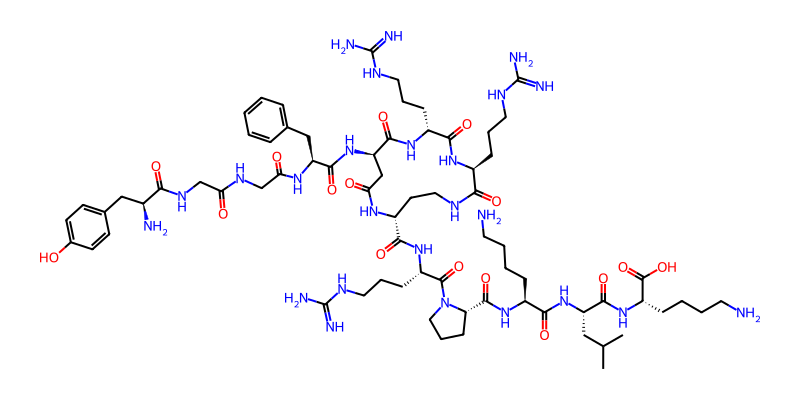

In [100]:
# helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"
# helm = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
# helm = "PEPTIDE1{[dC].[dS].N.[dL].S.[dalloT].[dC].V.L.S.A.Y.W.R.N.L.N.N.F.H.R.F.S.G.M.G.F.G.[dP].Q.T.P}$PEPTIDE1,PEPTIDE1,7:R3-1:R3$$$"
# helm = "PEPTIDE1{[dP].G}|PEPTIDE2{Y.[dOrn].[1-Nal]}$PEPTIDE2,PEPTIDE1,3:R2-1:R1|PEPTIDE2,PEPTIDE1,2:R3-2:R2$$$"
# helm = "PEPTIDE1{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}|PEPTIDE2{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}$PEPTIDE2,PEPTIDE1,2:R3-2:R3$$$"
helm = "PEPTIDE1{Y.G.G.F.[dD]}|PEPTIDE2{[dR].R}|PEPTIDE3{[dDab].R.P.K.L.K}$PEPTIDE3,PEPTIDE2,1:R3-2:R2|PEPTIDE1,PEPTIDE2,5:R2-1:R1|PEPTIDE1,PEPTIDE3,5:R3-1:R1$$$"
# helm = "PEPTIDE1{[COC(=O)[C@H](CCCCN)N1C(=O)CC[C@@H](NC(=O)OC(C)(C)C)C(=O)N[C@H](Cc2ccccc2)C1=O]}$$$$"
# helm = "PEPTIDE1{F}|PEPTIDE2{[Dab]}|PEPTIDE3{[ac].[dNal].[dPhe(4-Cl)].[d3-Pal].D.E.[dCit].L}|PEPTIDE4{P.[Dpr].[am]}$PEPTIDE2,PEPTIDE4,1:R2-1:R1|PEPTIDE4,PEPTIDE3,2:R3-5:R3|PEPTIDE3,PEPTIDE1,6:R3-1:R1|PEPTIDE2,PEPTIDE1,1:R3-1:R2|PEPTIDE3,PEPTIDE2,8:R2-1:R1$$$"

mol = converter._convert(helm, verbose=True)
draw_mol(mol, 800, 400)

False
CCC=CC[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C ...helm -> smiles
CC/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C ...smiles -> smiles
CC/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C ...raw


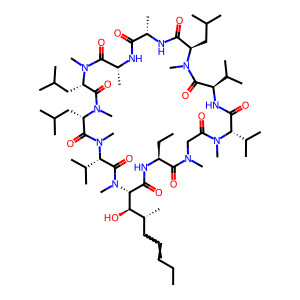

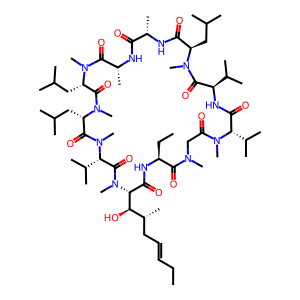

In [25]:
# helm, smiles = "PEPTIDE1{[dC].[dD].G.[Hpr].G.[Hyp].N.[dC].[am]}$PEPTIDE1,PEPTIDE1,8:R3-1:R3$$$", "NC(=O)C[C@@H]1NC(=O)[C@@H]2C[C@@H](O)CN2C(=O)CNC(=O)[C@@H]2CCCCN2C(=O)CNC(=O)[C@@H](CC(=O)O)NC(=O)[C@H](N)CSSC[C@H](C(N)=O)NC1=O"
# helm, smiles = "PEPTIDE1{H.S.K.R.R.L.I.[X11]}$$$$", "CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CO)NC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N/C(=C\c1ccccc1)C(=O)O"
helm, smiles = "PEPTIDE1{[X1759].[Abu].[Sar].[meV].[dV].[Me_dL].A.[dA].[meL].[meL].[meV]}$PEPTIDE1,PEPTIDE1,11:R2-1:R1$$$", "CC/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C"

mol_helm = converter.convert(helm)
mol_helm = Chem.RemoveHs(mol_helm)
mol_smiles = get_main_mol(Chem.MolFromSmiles(smiles))

width = 300
height = 300

print(is_same_mol(mol_helm, mol_smiles, ))
print(Chem.MolToSmiles(mol_helm) + " ...helm -> smiles")
print(Chem.MolToSmiles(mol_smiles) + " ...smiles -> smiles")
print(smiles + " ...raw")

draw_mol(mol_helm, width, height)
draw_mol(mol_smiles, width, height)

In [ ]:
helm = "PEPTIDE1{[X1670]}$$$$" # n=139, removed w:1.0 and added /
mol = converter._convert(helm, close=False)
print(Chem.MolToSmiles(mol))
mol

In [ ]:
#test converter

import cProfile
import csv

test_data: list[tuple] = []
file_path = molgen_path + "data/helm/chembl34_protein_helm.csv"

with open(file_path, newline='', encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)    # skip header
    for row in reader:
        test_data.append(tuple(row))

def test():
    monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library_edited.xml"
    lib = MonomersLib()
    lib.load_lib(monomers_lib_path)
    converter = HELMConverter(lib)
    success_count = 0
    unmatch_count = 0
    none_count = 0
    for helm, id, smiles in test_data:
        mol1 = converter.convert(helm)
        mol2 = standardize_mol(Chem.MolFromSmiles(smiles))

        if mol1 is None:
            none_count += 1
            print("None - helm: " + helm + ", smiles: " + smiles)
        elif is_same_mol(mol1, mol2):
            success_count += 1
        else:
            unmatch_count += 1
            print("Unmatch - helm: " + helm + ", smiles: " + smiles)
    print("success_count: " + str(success_count) + ", none_count: " + str(none_count) + " unmatch_count: " + str(unmatch_count))

cProfile.run("test()")
test()

In [87]:
s = "C[C@H](N[H:1])C([OH:2])=O"
print(MonomersLib.atom_mapped_to_cx(s))

*N[C@@H](C)C(*)=O |$_R1;;;;;_R2;$|
